In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('../../data/processed/test.csv')
df

,Id,Surface_logement,Surface_habitable,Surface_basement,Surface_1ere_plan,Surface_2eme_plan,Surface_garage,Surface_pavage,Annee_construction,OverallQual,...,Qualite_basement,Quartier,Type_zone,Annee_remodage,Annee_garage,Nombre_chemines,Nombre_basement_baignoire,Nombre_baignoire,Nombre_chambres_par_etage,Nombre_cuisine_par_etage
0,1461,11622,896,882.0,896,0,730.0,140,1961,5,...,TA,NAmes,RH,1961,1961.0,0,0.0,1,2,1
1,1462,14267,1329,1329.0,1329,0,312.0,393,1958,6,...,TA,NAmes,RL,1958,1958.0,0,0.0,1,3,1
2,1463,13830,1629,928.0,928,701,482.0,212,1997,5,...,Gd,Gilbert,RL,1998,1997.0,1,0.0,2,3,1
3,1464,9978,1604,926.0,926,678,470.0,360,1998,6,...,TA,Gilbert,RL,1998,1998.0,1,0.0,2,3,1
4,1465,5005,1280,1280.0,1280,0,506.0,0,1992,8,...,Gd,StoneBr,RL,1992,1992.0,0,0.0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,2912,13384,1360,1104.0,1360,0,336.0,160,1969,5,...,TA,Mitchel,RL,1979,1969.0,1,1.0,1,3,1
1338,2913,1533,1092,546.0,546,546,286.0,0,1970,4,...,TA,MeadowV,RM,1970,1970.0,0,0.0,1,3,1
1339,2916,1894,1092,546.0,546,546,286.0,0,1970,4,...,TA,MeadowV,RM,1970,1970.0,0,0.0,1,3,1
1340,2917,20000,1224,1224.0,1224,0,576.0,474,1960,5,...,TA,Mitchel,RL,1996,1960.0,1,1.0,1,4,1


In [10]:
df_price = pd.read_csv('../../data/raw/sample_submission.csv')

In [12]:
df_merge = pd.merge(df, df_price, on='Id', how='inner')

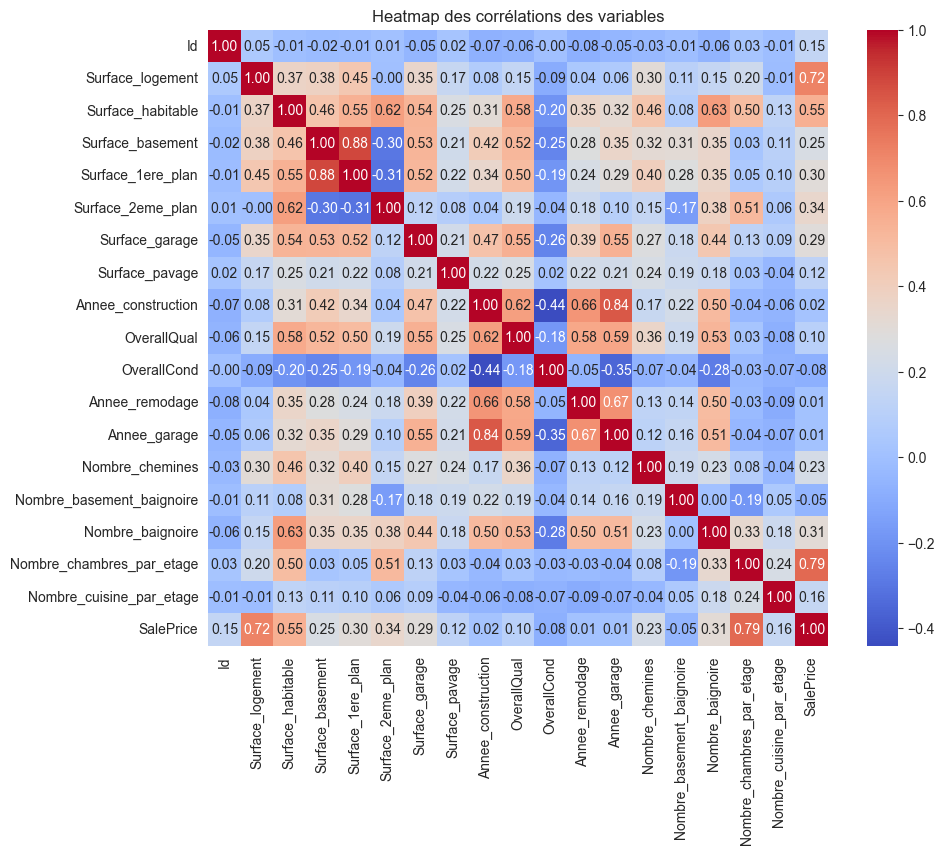

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Option 1 : Encoder les variables catégorielles (conversion en colonnes indicatrices)
df_encoded = pd.get_dummies(df_merge)

# Option 2 (ou complémentaire) : Sélectionner uniquement les colonnes numériques
df_numeric = df_encoded.select_dtypes(include=[np.number])

# Calculer la matrice de corrélation à partir des données numériques
corr_matrix = df_numeric.corr()

# Afficher la heatmap des corrélations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap des corrélations des variables")
plt.show()